In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set() # Default seaborn styles

In [62]:
df = pd.read_csv('Use_of_Telemedicine_During_COVID-19.csv')

# Remap Indicator Values to Easier to Read Acronyms

In [63]:
indicator_remap = {'Provider offers telemedicine': 'TM', 'Provider offered telemedicine prior to pandemic': 'PTM', 'Scheduled one or more telemedicine appointments': 'STM' }
df['Indicator'] = df['Indicator'].map(indicator_remap)

# Data Exploration

## Get %  of people answering "Yes" one of 3 Telemedicine Questions, Grouped by Age, Chronic Conditions, Etc.

In [64]:
all_yes = df.groupby(['Round','Group', 'Subgroup', 'Indicator']).nth(1).drop(['Sample Size', 'Suppression', 'Significant'], axis = 1)

## Plot % of People with access to Telemedicine Before and After Pandemic

In [72]:
# Pivot so columns are % telehealth before, % scheduled telehealth, % telehealth after pandemic
indicator_by_sgroup = pd.pivot(all_yes.loc[1].reset_index(), index='Subgroup', columns='Indicator', values='Percent')
# Add a column calculating % change between telehealth now and telehealth before pandemic
indicator_by_sgroup['telemed before and after pandemic % change'] = (100 * (indicator_by_sgroup['TM'] - indicator_by_sgroup['PTM']) / indicator_by_sgroup['PTM']).round(2)

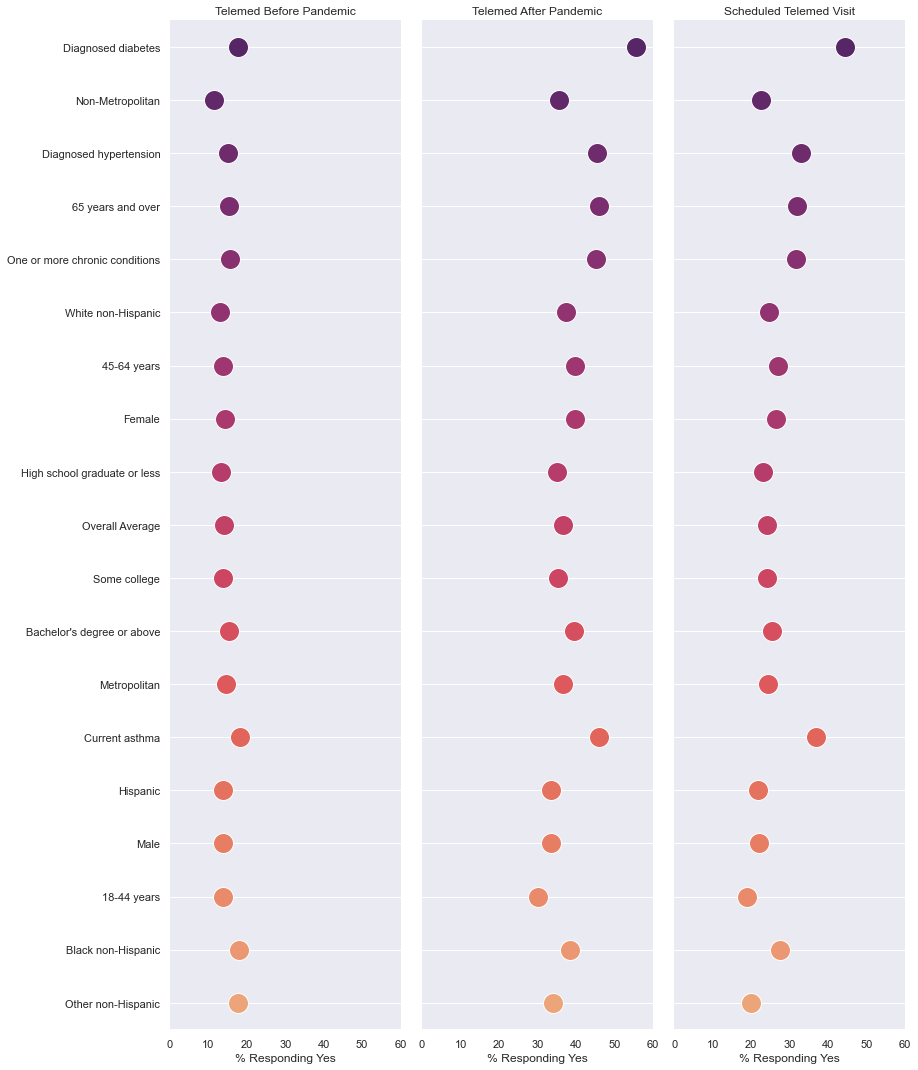

In [73]:
# Reorder columns
indicator_by_sgroup = indicator_by_sgroup.reindex(columns=['PTM', 'TM', "STM", 'telemed before and after pandemic % change'])
# Rename the 'Total' subgroup to be more clear
indicator_by_sgroup.rename(index={'Total': "Overall Average"}, inplace=True)

# Make the PairGrid
g = sns.PairGrid(indicator_by_sgroup.sort_values('telemed before and after pandemic % change', ascending=False).reset_index(),
                 x_vars=indicator_by_sgroup.columns[:-1], y_vars='Subgroup', height=15, aspect=.25)

# Draw a dot plot using the stripplot function
g.map(sns.stripplot, size=20, orient="h", jitter=False, palette="flare_r", linewidth=1, edgecolor="w")

# Use the same x axis limits on all columns and add better labels
g.set(xlim=(0, 60), xlabel="% Responding Yes", ylabel="")

# Use semantically meaningful titles for the columns
titles = ["Telemed Before Pandemic", "Telemed After Pandemic", "Scheduled Telemed Visit"]

for ax, title in zip(g.axes.flat, titles):

    # Set a different title for each axes
    ax.set(title=title)

    # Make the grid horizontal instead of vertical
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)

sns.despine(left=True, bottom=True)

g.savefig('yes_by_indicator.png')

# Table % of People with access to Telehealth Before and After Pandemic and % Ppl that schedule telehealth appointments

In [74]:
# Add a column calculating percentage of ppl with access to telemed actually scheduled 
indicator_by_sgroup['%scheduled of available telemed'] = (100 * indicator_by_sgroup['STM'] / indicator_by_sgroup['TM']).round(2)
indicator_by_sgroup.sort_values('telemed before and after pandemic % change', ascending=False)

Indicator,PTM,TM,STM,telemed before and after pandemic % change,%scheduled of available telemed
Subgroup,,,,,
Diagnosed diabetes,17.8,55.7,44.4,212.92,79.71
Non-Metropolitan,11.6,35.7,22.6,207.76,63.31
Diagnosed hypertension,15.1,45.6,32.9,201.99,72.15
65 years and over,15.3,45.9,32.0,200.00,69.72
One or more chronic conditions,15.6,45.3,31.6,190.38,69.76
White non-Hispanic,13.0,37.4,24.7,187.69,66.04
45-64 years,13.9,39.8,26.9,186.33,67.59
Female,14.4,39.7,26.4,175.69,66.50
High school graduate or less,13.2,35.0,23.1,165.15,66.00


## Get % Change of Telehealth Availability Before/After Pandemic Across Groups And rounds . Now Decided to stop looking at R1 v R2 Data -- didn't find much different between the two

### Round 2 Responses (August 2020)

In [396]:
# # Deconstruct groupby df into component columns
# r2_reset = all_yes.loc[2].reset_index()
# # Add "Indicator" as a categorical column
# pivoted = r2_reset[r2_reset.Indicator == 'TM'].merge(right=r2_reset[r2_reset.Indicator == 'PTM'], on=['Group', 'Subgroup'], suffixes=('_tm', '_ptm'))
# # Add column currently offering telehealth - used to offer telehealth
# pivoted['tm-ptm diff'] = pivoted.Percent_tm - pivoted.Percent_ptm

# r2_differences_by_group = pivoted[['Group', 'Subgroup', 'tm-ptm diff']]
# r2_differences_by_group.sort_values(by='tm-ptm diff', ascending=False)

,Group,Subgroup,tm-ptm diff
4,Chronic conditions,Diagnosed diabetes,37.2
2,Age group,65 years and over,31.6
5,Chronic conditions,Diagnosed hypertension,31.1
6,Chronic conditions,One or more chronic conditions,29.1
3,Chronic conditions,Current asthma,28.6
14,Sex,Female,26.5
7,Education,Bachelor's degree or above,26.5
1,Age group,45-64 years,25.8
13,Race/Hispanic origin,White non-Hispanic,25.5
17,Urbanization,Metropolitan,23.3


# Current Work Below